### 1. Data Cleaning based on EDA

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"US_Visadataset.csv")

In [3]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


##### 1.1 `case_id` column can be dropped as it is an ID.
#### 1.2 `requires_job_training` column can be dropped as it doesn't have much impact on target variable, Proved in visualization and chi2 test.

In [4]:
df_1 = df.drop(columns=["case_id","requires_job_training"])

In [5]:
df_1.head()

,continent,education_of_employee,has_job_experience,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,1082,2005,South,149907.3900,Year,Y,Certified


#### 1.3  `continent` columns has few unique values with very less count, which can be made as **others**

In [6]:
df_1.continent.value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [7]:
def make_others_continent(x):
    if x not in ["Asia","Europe","North America"]:
        return "others"
    return x

In [8]:
df_1["continent"] = df_1["continent"].apply(make_others_continent)

In [9]:
df_1.continent.value_counts()

continent
Asia             16861
Europe            3732
North America     3292
others            1595
Name: count, dtype: int64

#### 1.4 `no_of_employees`, `prevailing_wage` columns have outllier which should be handled.

In [10]:
df_1["no_of_employees"].describe() ,  df_1["prevailing_wage"].describe()

(count     25480.000000
 mean       5667.043210
 std       22877.928848
 min         -26.000000
 25%        1022.000000
 50%        2109.000000
 75%        3504.000000
 max      602069.000000
 Name: no_of_employees, dtype: float64,
 count     25480.000000
 mean      74455.814592
 std       52815.942327
 min           2.136700
 25%       34015.480000
 50%       70308.210000
 75%      107735.512500
 max      319210.270000
 Name: prevailing_wage, dtype: float64)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px

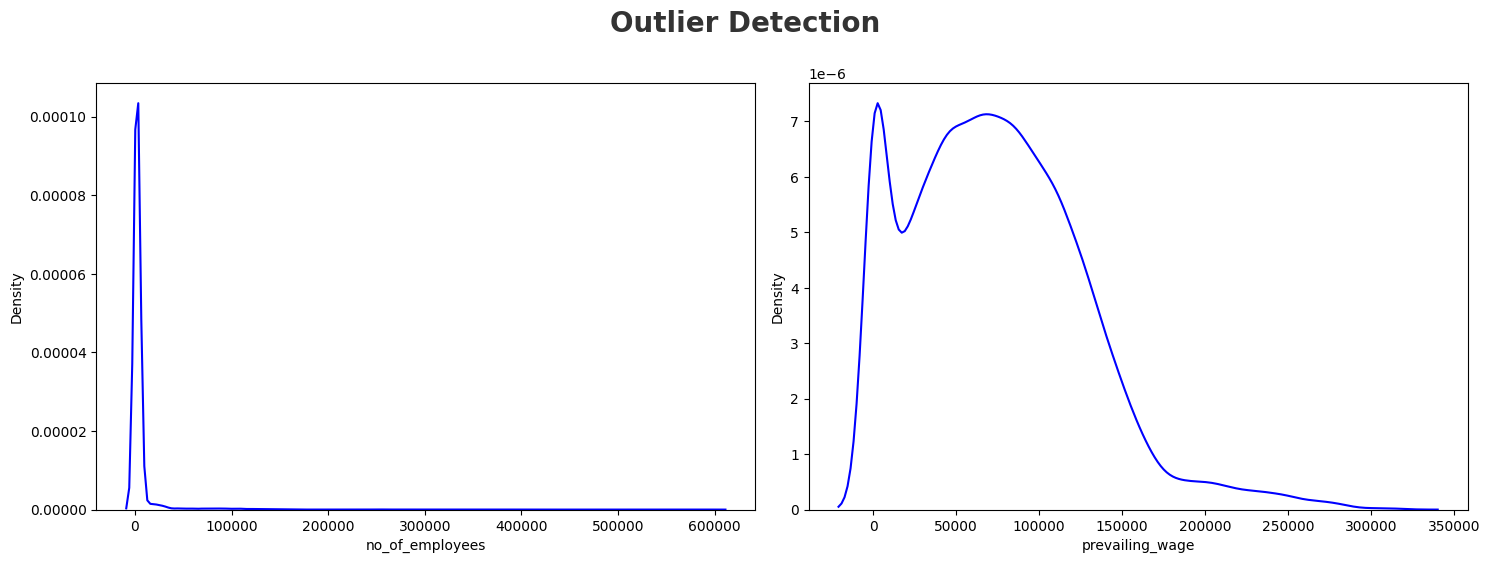

In [12]:
plt.figure(figsize=(15, 10))
plt.suptitle('Outlier Detection', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
numeric_features = ['no_of_employees', 'prevailing_wage']
for i in range(0, len(numeric_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df_1[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [14]:
median_75_no_of_employees = 7500.210000
outlier_free_data_on_no_of_employees =  df_1[df_1["no_of_employees"]<7500.210000]#mean_no_of_employees +0*sd_no_of_employees]
mean_prevailing_wage = 74455.814592
sd_prevailing_wage = 52815.942327
outlier_free_data_on_prevailing_wage = df_1[df_1["prevailing_wage"]<mean_prevailing_wage+2*sd_prevailing_wage]

In [15]:
df_2 = df_1.copy()
df_2 = df_2[df_2["no_of_employees"]<7500.210000]
df_2 = df_2[df_2["prevailing_wage"]<mean_no_of_employees+2*sd_prevailing_wage]

NameError: name 'mean_no_of_employees' is not defined

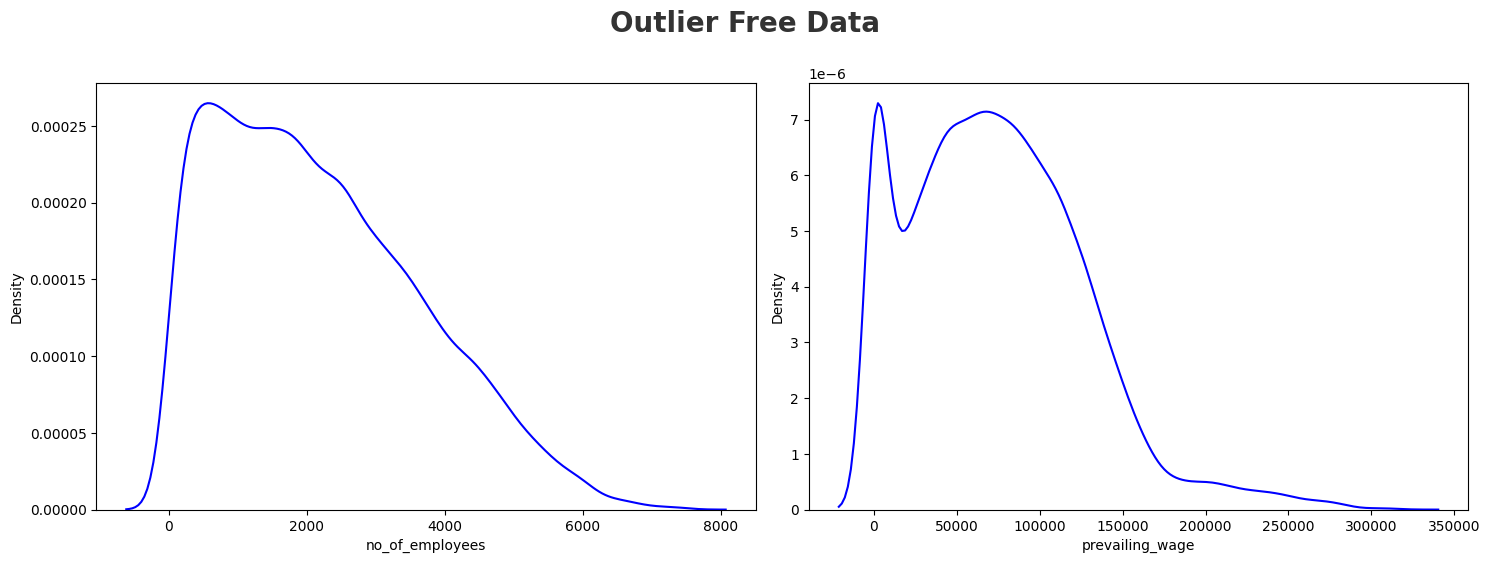

In [16]:
plt.figure(figsize=(15, 10))
plt.suptitle('Outlier Free Data', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
numeric_features = ['no_of_employees', 'prevailing_wage']
for i in range(0, len(numeric_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df_2[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

##### 1.5 Target column `case_status` is imbalanced can be handled before model building.
* will do shuffle at model traning

In [17]:
## 2 Feature Engineering

In [18]:
df_2

,continent,education_of_employee,has_job_experience,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,Asia,Master's,Y,2412,2002,Northeast,83425.65,Year,Y,Certified
3,Asia,Bachelor's,N,98,1897,West,83434.03,Year,Y,Denied
4,others,Master's,Y,1082,2005,South,149907.39,Year,Y,Certified
5,Asia,Master's,Y,2339,2012,South,78252.14,Year,Y,Certified
6,Asia,Bachelor's,N,4985,1994,South,53635.39,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,Asia,High School,Y,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,Asia,Master's,Y,1121,1910,South,146298.85,Year,N,Certified
25478,Asia,Master's,Y,1918,1887,West,86154.77,Year,Y,Certified


In [19]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23937 entries, 1 to 25479
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              23937 non-null  object 
 1   education_of_employee  23937 non-null  object 
 2   has_job_experience     23937 non-null  object 
 3   no_of_employees        23937 non-null  int64  
 4   yr_of_estab            23937 non-null  int64  
 5   region_of_employment   23937 non-null  object 
 6   prevailing_wage        23937 non-null  float64
 7   unit_of_wage           23937 non-null  object 
 8   full_time_position     23937 non-null  object 
 9   case_status            23937 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.0+ MB


#### 2.1 Doing Label encoding on Catagorical values

In [20]:
# Changing 2 variable catagory first 
def no_yes(x):
    if x=="Y" or x=="Certified" :
        return 1
    return 0

In [21]:
df_3 = df_2.copy()

In [22]:
df_3["has_job_experience"] = df_3["has_job_experience"].apply(no_yes)
df_3["full_time_position"] = df_3["full_time_position"].apply(no_yes)
df_3["case_status"] = df_3["case_status"].apply(no_yes)

In [25]:
df_3

,continent,education_of_employee,has_job_experience,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,Master's,1,2412,2002,Northeast,83425.65,Year,1,1
1,Asia,Bachelor's,0,98,1897,West,83434.03,Year,1,0
2,others,Master's,1,1082,2005,South,149907.39,Year,1,1
3,Asia,Master's,1,2339,2012,South,78252.14,Year,1,1
4,Asia,Bachelor's,0,4985,1994,South,53635.39,Year,1,1
...,...,...,...,...,...,...,...,...,...,...
23932,Asia,Bachelor's,1,2601,2008,South,77092.57,Year,1,1
23933,Asia,High School,1,3274,2006,Northeast,279174.79,Year,1,1
23934,Asia,Master's,1,1121,1910,South,146298.85,Year,0,1
23935,Asia,Master's,1,1918,1887,West,86154.77,Year,1,1


In [24]:
df_3 = df_3.reset_index().drop(columns = ["index"])

In [26]:
from sklearn.preprocessing import OneHotEncoder
coder = OneHotEncoder()

In [27]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23937 entries, 0 to 23936
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              23937 non-null  object 
 1   education_of_employee  23937 non-null  object 
 2   has_job_experience     23937 non-null  int64  
 3   no_of_employees        23937 non-null  int64  
 4   yr_of_estab            23937 non-null  int64  
 5   region_of_employment   23937 non-null  object 
 6   prevailing_wage        23937 non-null  float64
 7   unit_of_wage           23937 non-null  object 
 8   full_time_position     23937 non-null  int64  
 9   case_status            23937 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 1.8+ MB


In [28]:
categorical_features = [feature for feature in df_3.columns if df_3[feature].dtype == 'O']
numeric_features = [feature for feature in df_3.columns if df_3[feature].dtype != "O"]
# categorical_features,numeric_features

In [29]:
encoded_data = coder.fit_transform(df_3[categorical_features])
# encoded_data = pd.DataFrame(encoded_data.toarray())
len(encoded_data.toarray())

23937

In [30]:
df_4 = df_3.join(pd.DataFrame(encoded_data.toarray()))
df_4

,continent,education_of_employee,has_job_experience,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,...,7,8,9,10,11,12,13,14,15,16
0,Asia,Master's,1,2412,2002,Northeast,83425.65,Year,1,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Asia,Bachelor's,0,98,1897,West,83434.03,Year,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,others,Master's,1,1082,2005,South,149907.39,Year,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,Asia,Master's,1,2339,2012,South,78252.14,Year,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,Asia,Bachelor's,0,4985,1994,South,53635.39,Year,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23932,Asia,Bachelor's,1,2601,2008,South,77092.57,Year,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
23933,Asia,High School,1,3274,2006,Northeast,279174.79,Year,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23934,Asia,Master's,1,1121,1910,South,146298.85,Year,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
23935,Asia,Master's,1,1918,1887,West,86154.77,Year,1,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [31]:
print("Basically Classes are : ")
coder.categories_

Basically Classes are : 


[array(['Asia', 'Europe', 'North America', 'others'], dtype=object),
 array(["Bachelor's", 'Doctorate', 'High School', "Master's"], dtype=object),
 array(['Island', 'Midwest', 'Northeast', 'South', 'West'], dtype=object),
 array(['Hour', 'Month', 'Week', 'Year'], dtype=object)]

In [32]:
columnsname = {0:'Asia',1: 'Europe',2: 'North America',3:"others", 4:"Bachelor's",5: 'Doctorate',6:"High School",7:"Master's",
              8:'Island', 9:'Midwest',10: 'Northeast',11: 'South', 12:'West',13:'Hour', 14:'Month',15: 'Week', 16:'Year' }
df_6 = df_4.drop(columns=["education_of_employee","continent","region_of_employment","unit_of_wage"])
df_6 =df_6.rename(columns=columnsname)

In [33]:
df_6.head()

,has_job_experience,no_of_employees,yr_of_estab,prevailing_wage,full_time_position,case_status,Asia,Europe,North America,others,...,Master's,Island,Midwest,Northeast,South,West,Hour,Month,Week,Year
0,1,2412,2002,83425.65,1,1,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,98,1897,83434.03,1,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1,1082,2005,149907.39,1,1,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1,2339,2012,78252.14,1,1,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0,4985,1994,53635.39,1,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [35]:
X  = df_6.drop(columns=["case_status"])
y = df_6["case_status"]

In [49]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21,stratify=y)

# Define scaling methods
scaling_methods = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

models = {
    'SVM': (SVC(), {'classifier__C': [0.1, 1, 10], 'classifier__kernel': ['linear', 'rbf']}),
    'RandomForest': (RandomForestClassifier(), {'classifier__n_estimators': [50, 100, 200], 'classifier__max_depth': [None, 10, 20]})
}

In [51]:
results = {}
for scaler_name, scaler in scaling_methods.items():
    for model_name, (model, param_grid) in models.items():
        pipeline = Pipeline([
            ('scaler', scaler),
            ('classifier', model)
        ])
        
        # Perform grid search cross-validation
        grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        # Store best cross-validation score
        results[(scaler_name, model_name)] = grid_search.best_score_

# Display results
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Best Cross-Validation Score'])
print(results_df)